# Grovers Search Activity

Grovers Activity
Pre-Survey (10 min)
Classical Search Review (15 min)
Quantum Foundations (5 min)
Grover’s Algorithm Overview (5 min)
Hands-On Grover Notebook (35 min)
Comparison between classic and quantum search (5 min)
Post-Survey + Quiz (15 min)



## Complete Pre-Survey linked here:
(INSERT LINK HERE)

## Classical Search

INSERT Classical Search Materials Here


Ledger:
Method                         | Big-O   
-------------------------------------------
Brute force (linear search)    | O(n)    
Binary search                  | O(log n)
Hash dict lookup               | O(1)    


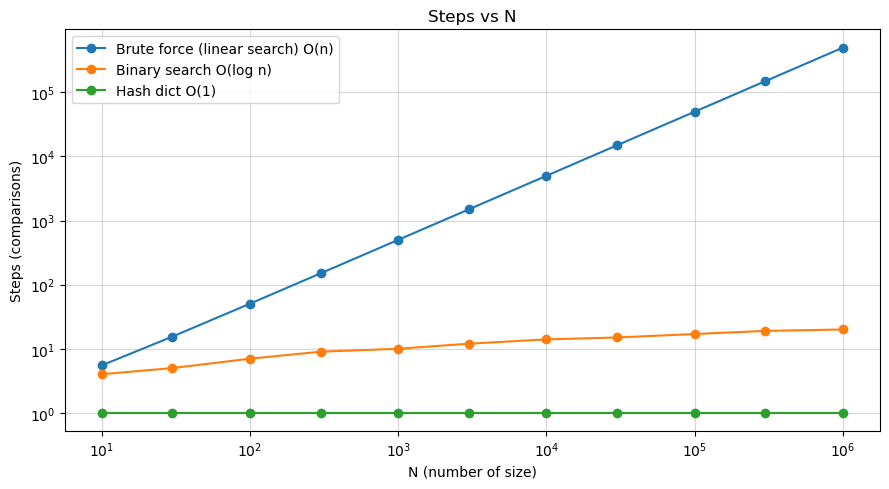

In [1]:
import math
import matplotlib.pyplot as plt


# Linear search (average-case)
def steps_linear_avg(n: int) -> float:
    return (n + 1) / 2

# Binary search (average-case)
def steps_binary_avg(n: int) -> int:
    return math.ceil(math.log2(n)) if n > 1 else 1

# Hash table (Python dict) average-case
def steps_hash_avg(_: int) -> int:
    return 1  # average O(1)


def main():
    Ns = [10, 30, 100, 300, 1_000, 3_000, 10_000, 30_000, 100_000, 300_000, 1_000_000]

    # ---- Ledger (table) ----
    ledger = [
        {"Method": "Brute force (linear search)", "Big-O": "O(n)"},
        {"Method": "Binary search",               "Big-O": "O(log n)"},
        {"Method": "Hash dict lookup",            "Big-O": "O(1)"},
    ]

    print("\nLedger:")
    print(f"{'Method':30} | {'Big-O':8}")
    print("-" * 43)
    for row in ledger:
        print(f"{row['Method'][:30]:30} | {row['Big-O']:8}")

    # ---- Compute average step curves ----
    lin_avg = [steps_linear_avg(n) for n in Ns]
    bin_avg = [steps_binary_avg(n) for n in Ns]
    hsh_avg = [steps_hash_avg(n) for n in Ns]

    # ---- Plot ----
    plt.figure(figsize=(9, 5))
    plt.plot(Ns, lin_avg, marker="o", label="Brute force (linear search) O(n)")
    plt.plot(Ns, bin_avg, marker="o", label="Binary search O(log n)")
    plt.plot(Ns, hsh_avg, marker="o", label="Hash dict O(1)")

    plt.xscale("log")
    #plt.xlim(1, max(Ns))
    plt.yscale("log")
    plt.minorticks_off()  # REMOVE mid / minor tick markers
    plt.xlabel("N (number of size)")
    plt.ylabel("Steps (comparisons)")
    plt.title("Steps vs N")
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

Question 1 Checking every item one by one is called:

a) Binary search

b) Brute-force (linear) search

c) Random search

In [2]:
ANSWER_1 = "a"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

Question 2 Binary search works best when the list is:

a) Random

b) Sorted

c) Very small

In [3]:
ANSWER_2 = "TYPE ANSWER HERE"
if (ANSWER_2 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

ValueError: Please answer the question

Question 3 What does a Python dictionary search do?

a) Look up values quickly

b) Sort numbers

c) Draw graphs

In [ ]:
ANSWER_3 = "TYPE ANSWER HERE"
if (ANSWER_3 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

## Quantum Background

Quantum Computing works by applying "gates" on "qubits". 
The typical way of representing qubits is as state vectors.

Lets say we have a qubit, it can either be $|0\rangle$ and $|1\rangle$ analogous to the binary bits 0 and 1

The $|\rangle$ notation is called a "ket" and is just a way to represent column vectors commonly used in quantum mechanics

The most common kets in quantum computing are $|0\rangle$ = $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|1\rangle$ = $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$


In classical computing a bit either has an 100% chance to be 0 or an 100% chance to be 1 but in quantum computing the probabilites are not always 100%

For example if we have a generic qubit $|\psi\rangle$ we can represent its state as  $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ where $||\alpha\|^2$ + $||\beta\|^2$ = 1

$||\alpha\|^2$ is the probability we measure the qubit to be in the $|0\rangle$ state and $||\beta\|^2$ is the probabiltiy we measure the qubit to be in the $|1\rangle$ state

For example if $|\psi\rangle$ = $\frac{1}{\sqrt{2}} |0\rangle$ + $\frac{1}{\sqrt{2}} |1\rangle$ then when we measure the qubit we have a 50% chance we will measure the result $|0\rangle$ and a 50% we will measure the result $|1\rangle$

This is called superposition where the qubit could either be in the 0 state or the 1 state. This chance to be in either state is one of the most important and powerful ideas of quantum computing


Conceptual Checkin: 

Given the state $|\psi\rangle$ = $\frac{1}{\sqrt{3}} |0\rangle$ + $\sqrt{\frac{2}{3}} |1\rangle$ 

what is the probability we measure the qubit to be $|0\rangle$  and whats the probability we measure it to be $|1\rangle$ 

<details>
  <summary>Click to expand the answer<br></summary>

Theres a $\left|\frac{1}{\sqrt{3}}\right|^2$ = $\frac{1}{3}$ chance to measure $|0\rangle$ and a $\left|\sqrt{\frac{2}{3}}\right|^2$ = $\frac{2}{3}$ chance to measure $|1\rangle$


</details>

Now that we know a little bit about what qubits are and how they are represented now lets talk a little bit about Quantum Gates. There are 2 common gates we will use in this activity the $X$ (NOT) gate and the Hadamard $H$ gate. 
The $X$ or NOT gate works just like the NOT gate works in classical computing, it flips 0 to 1 and vice versa.
Its matrix representation is $X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}$

For example, when applied to the $|0\rangle$ state

$X |0\rangle$ = $\begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}$  $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ = $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$= $|1\rangle$

The Hadamard or H gate puts a qubit in equal superposition of its possible states

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}$ 

For example, when applied to the $|0\rangle$ state

$H |0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}$ $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ =
$\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ 1\end{pmatrix}$ = 
$\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ 0\end{pmatrix}$ + $\frac{1}{\sqrt{2}}\begin{pmatrix}0\\ 1\end{pmatrix}$ = 
$\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle$


$H |1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}$ $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ =
$\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ -1\end{pmatrix}$ = 
$\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ 0\end{pmatrix}$ - $\frac{1}{\sqrt{2}}\begin{pmatrix}0\\ 1\end{pmatrix}$ = 
$\frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle$

In both cases appling the Hadamard gate puts the qubit into a superposition between the two possible states. Because of how powerful this is, we will often start circuits by applying Hadamard gates to qubits. 

Usually in a quantum circuit we have multiple qubit systems. In this activity we will mostly work in 2 or 3 qubit systems. If we have 3 qubits with the "0th" qubit in the 1 state, the "1st" qubit in the 1 state and the "2nd" qubit in the 0 state we can represent it using one ket. $|011\rangle$

When we measure the qubit it will collapse into one of the states and will always be in that state when we measure it. This means the qubit loses its special property that makes it so powerful so we usually dont measure it until the very end after the circuit is finished. 

Another important phyiscs property that quantum computing uses is **interference**. 

Imagine dropping two pebbles into water. The ripples spread out as waves, and when they meet, they combine: peaks with peaks make a bigger wave, while a peak meeting a trough cancels out. Quantum particles behave similarly — their probability amplitudes act like waves, so different paths can reinforce each other or cancel out, which is called quantum interference.


In quantum mechanics qubits are often represented as sin or cos waves which means they can constructivly or destructively interfere with eachother. This is **Interference** and it is another property of quantum computers that make them so powerful.

For example if we have the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle+|1\rangle$
and we apply the hadamard gate to it we get this result

\begin{align}
H|\psi\rangle 
&= H\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) \\ 
&= \frac{1}{\sqrt{2}} \big(H|0\rangle + H|1\rangle\big) \\
&= \frac{1}{\sqrt{2}} \Big[ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) + \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \Big] \\
&= \frac{1}{2} (|0\rangle + |1\rangle + |0\rangle - |1\rangle) \\
&= |0\rangle
\end{align}


Looking at line 4, we can see there is a +$|1\rangle$ from the original 0 state and a -$|1\rangle$ from the original 1 state which cancel out since they add opposite signs. The probablitly amplitudes of the $|1\rangle$ state interfered destructively which in this case caused the $|1\rangle$ to be completely removed from the system. On the other hand, we can see there is a +$|0\rangle$ from the original 0 state and a +$|0\rangle$ from the original 1 state. Since they have the same sign they constructivly interfere and in this case they cause the system to be measured with 100% probabiltiy in the 0 state.


Conceptual check in: 
What do you think will be left over after this operation 
$H|\psi\rangle = H\left(\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\right)$

<details>
  <summary>Click to expand the answer<br></summary>

$$
\begin{aligned}
H|\psi\rangle 
&= H\left(\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\right) \\
&= \frac{1}{\sqrt{2}} \big(H|0\rangle - H|1\rangle\big) \\
&= \frac{1}{\sqrt{2}} \Big[ \frac{|0\rangle + |1\rangle}{\sqrt{2}} - \frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big] \\
&= \frac{1}{2} \big( |0\rangle + |1\rangle - |0\rangle + |1\rangle \big) \\
&= \frac{1}{2} ( 2 |1\rangle ) \\
&= |1\rangle
\end{aligned}
$$

</details>


QUESTION 4
What is the effect of applying a Hadamard gate to $|0\rangle$?

a) Leaves it unchanged

b) Collapses it to |1⟩

c) Creates an equal superposition of $|0\rangle$ and $|1\rangle$

d) Measures the qubit

In [ ]:
ANSWER_4 = "TYPE ANSWER HERE"
if (ANSWER_4 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

ValueError: Please answer the question

Question 5 Why don’t we measure the qubits immediately after creating superposition?

a) Measurement would collapse the state too early

b) Measurement makes the algorithm faster

c) Measurement increases entanglement

d) It doesn’t matter

In [ ]:
ANSWER_5 = "TYPE ANSWER HERE"
if (ANSWER_5 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

ValueError: Please answer the question

When we use multiple qubits:
2 qubits → 4 possible states
3 qubits → 8 possible states
n qubits → 2ⁿ possible states

## Grover's Algorithm Overview

Imagine you are searching for a single correct item hidden somewhere in a huge, unsorted list.
On a classical computer, you would check items one by one.
On a quantum computer, Grover’s Algorithm lets you “look at all items at once” and gradually boost the chance of finding the correct one.

Grover’s Algorithm works in three main ideas:

**Superposition** – look everywhere at once

**Oracle** – recognize the correct answer

**Amplitude Amplification** – make the correct answer stand out  

**Superposition**

Grover’s Algorithm starts by putting the system into a superposition of all possible answers.


**Oracle** Marking the Correct Answer

The oracle is a special quantum operation that recognizes the correct answer and “Marks” it without telling us what it is directly
Instead of pointing at the correct answer, the oracle flips the sign (phase) of the correct state’s amplitude
The oracle does not reveal the answer, it only tags the correct state so it can be amplified later


**Amplitude Amplification** Making the Answer Stand Out

After marking the correct answer, Grover’s Algorithm boosts the probability of measuring it and shrinks the probabilities of all others. When we measure a system it collapses to one of the states and the probability of collapsing to each state is the amplitude squared so the higher the amplitude is the higher chance the system has to collapse to that state.
This is done through a clever “reflection” process which is repeated multiple times:
Reflect amplitudes around their average
The marked state grows larger each time
Others shrink slightly


After enough repetitions the correct answer is much more likely to be measured so measuring the system gives the right answer with high probability


**Why Grover’s Algorithm Is Powerful**

For an unsorted list of length N  instead of a classic search algorithm taking O(N) to search through it Grover’s Algorithm takes ~O(√N) 

Because Binary Search also has O(log N) run time for structured sorted data it is actually better to use that than Grover's Algorithm if the data is sorted. Grover's is only better on unsorted data where the best classical searching 

Question Which classical algorithm does Grover’s replace?

a) Binary search

b) Hash-based search

c) Linear (brute-force) search

d) None of them


In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

For a list of size N, how does Grover’s algorithm compare to classical brute-force search?

a) Both take O(N) steps

b) Grover’s takes O(log N) steps

c) Grover’s takes O(√N) steps

d) Grover’s is constant time


In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

In which situation would Grover’s algorithm be most useful?

a) Searching a sorted list

b) Searching an unsorted list with no structure

c) Searching a hash table

d) Searching a very small list


In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

Why does Grover’s algorithm provide a speedup over brute-force search?

a) It exploits quantum superposition and amplitude amplification

b) It sorts the data first

c) It uses classical hashing

d) I’m not sure


In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

Which statement is true?

a) Grover’s algorithm works best on structured data

b) Grover’s algorithm works best on unstructured data

c) Grover’s algorithm replaces binary search

d) None of the above

In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

## Running Grover's Algorithm on AER Simulator

To run Grover's Algorithm we will first go through running it on Qiskit's AER simulator. Qiskit is a python library created by IBM. Its used to create quantum circuits and algorithms both on simulators and real quantum computers. In this activity we will use thier AER simulator. The AER simulator mimics a quantum circuit backend and this will allow us to create quantum circuits and see what they do without having to use a real quantum machine. 



Lets start by importing qiskit

In [ ]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



Next we will define the target bit string we are trying to find and set up the beginings of our ciruit

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


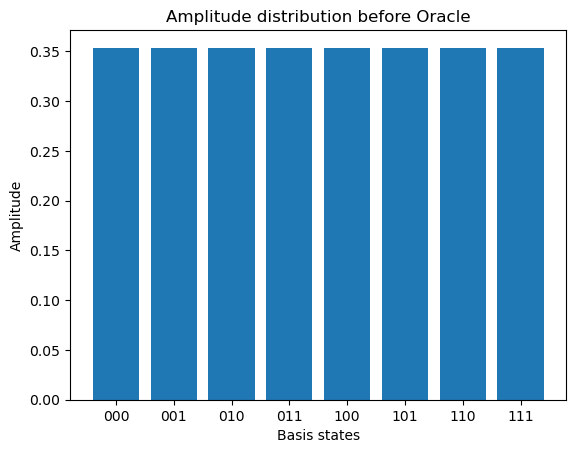

In [ ]:
target = "110"
n = len(target)
target = target[::-1] # reverse the bit string

cir = qiskit.QuantumCircuit(n)

# put the ciruit in a superpositon of all possible states
cir.h(range(n))

# plot the current amplitudes
cir.save_statevector()
sim = AerSimulator(method="statevector")
result = sim.run(cir).result()
state = result.get_statevector()
labels = [format(i, f'0{n}b') for i in range(2**n)]

plt.bar(labels, state)
plt.xlabel("Basis states")
plt.ylabel("Amplitude")
plt.title("Amplitude distribution before Oracle")
plt.show()


From the plots we can see all the possible states the quantum system can be in. We also see that the amplidute and therefore probability to be in each of those states is equal. 

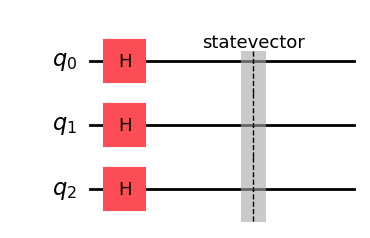

In [ ]:
#Optional draw the circuit
fig = (cir.draw(output="mpl"))
plt.show(fig)

Then we will define the Oracle
The Oracle is a special quantum operation that recognizes the correct answer and marks it by flipping its phase and flipping its amplitude to be negative. It does this by flipping quibits so that the target state we are searching for becomes all ones, flips the amplitude of that state to be negative, then reversing the qubit flipping from the beginning so that now the target state has the negative amplitude.


In [ ]:
# The circuit is in a superposition of all states 
# before being passed to Oracle
def Oracle(circuit):
    # change the target state to be all '1's
    for i in range (n): 
        if target[i] == '0':
            circuit.x(i)

    # does a phase flip on the '111' state to change
    # its amplidute to be negative
    circuit.h(n-1) 
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)

    # undoes the change from the first loop
    # now the target state has negative aplitude 
    # and is "marked" which is what we want
    for i in range (n):
        if target[i] == '0':
            circuit.x(i)


Lets create the ciruit again and apply the oracle to see how the amplitudes change

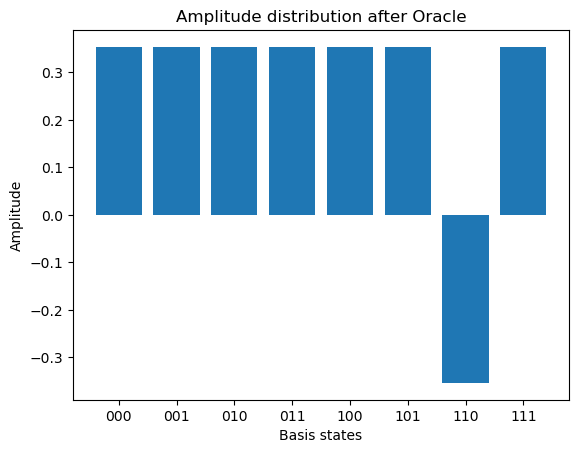

In [ ]:
cir = qiskit.QuantumCircuit(n)
# put the ciruit in a superpositon of all possible states
cir.h(range(n))
# Apply the Oracle
Oracle(cir)

# plot the current amplitudes
cir.save_statevector()
sim = AerSimulator(method="statevector")
result = sim.run(cir).result()
state = result.get_statevector()
labels = [format(i, f'0{n}b') for i in range(2**n)]

plt.bar(labels, state)
plt.xlabel("Basis states")
plt.ylabel("Amplitude")
plt.title("Amplitude distribution after Oracle")
plt.show()

As we can see, only the amplitude of the target state is changed and specifically it is fliped to be negative now. 
While this is helpful to be able to "find" something we really want the probabilty of measuring that state to be relativly high so we get the correct answer. Lets try plotting the probabily of measuring each state.

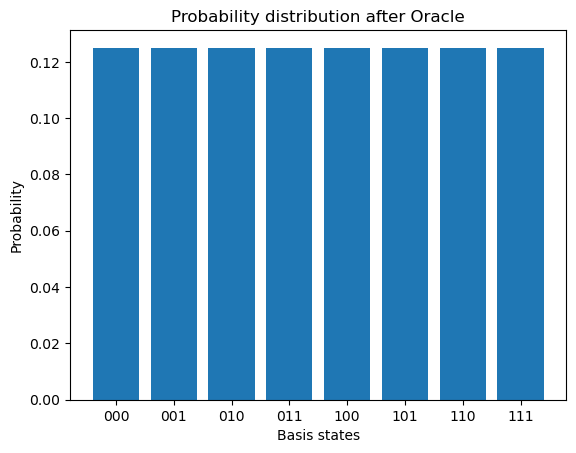

In [ ]:
labels = [format(i, f'0{n}b') for i in range(2**n)]
probs = np.abs(state) ** 2
plt.bar(labels, probs)
plt.xlabel("Basis states")
plt.ylabel("Probability")
plt.title("Probability distribution after Oracle")
plt.show()

As we can see, even though the amplitude of the target state has been flipped to be negative the probability of it being measured is still the same as all the other states. This is because probabilty equals amplitude squared so just making the amplitude negative isn't enough, we need to do something else to make it more certain we will measure the right result.

In [ ]:
#Optional draw the circuit
fig = (cir.draw(output="mpl"))
plt.show(fig)

Question What role does the oracle play in Grover’s algorithm?

a) It sorts the search space

b) It marks the correct state by changing its phase

c) It measures the system

d) It stores the database

In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

Add an explanation of what interference is and mayble bloch spheres??
**Bloch Sphere Simulator:**
 https://bloch.kherb.io/
 

Next we will define the Diffusion step 

The diffusion step in Grover’s algorithm is the part that increases the likelihood of measuring the correct answer. After the oracle marks the correct state by flipping its phase, the diffusion step reflects all amplitudes about their average value. This causes the marked state’s amplitude to increase while the amplitudes of the other states decrease slightly. Although no probabilities change directly during the oracle step, the diffusion step uses quantum interference to turn that phase difference into a higher measurement probability for the correct answer. Repeating the oracle and diffusion steps gradually amplifies the correct result.


How the diffusion step uses interference

In Grover’s algorithm, the oracle first flips the sign of the correct state's amplitude. Then the diffusion step figures out what the average amplitude is then reflects the amplitudes of the states around it causing the flipped state to constructively interfere and grow, while the others destructively interfere and shrink. In this way, interference systematically moves probability away from wrong answers and concentrates it on the correct one.


In [ ]:
def Diffusion(circuit):
    #convert back to the original basis
    for i in range (n):
        circuit.h(i)

    #flip all the qbits
    for i in range (n):
        circuit.x(i)

    # flips the phase of the "1111" state
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)

    #return circuit to correct basis
    for i in range (n):
        circuit.x(i)
    for i in range (n):
        circuit.h(i)

Once again we will recreate the circuit and plot how it changes after the diffusion step has been applied. 

What do you expect the probability of the correct answer to be after one Grover iteration?

a) Very low

b) Slightly higher than others

c) Much higher than others

d) Exactly 1


In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

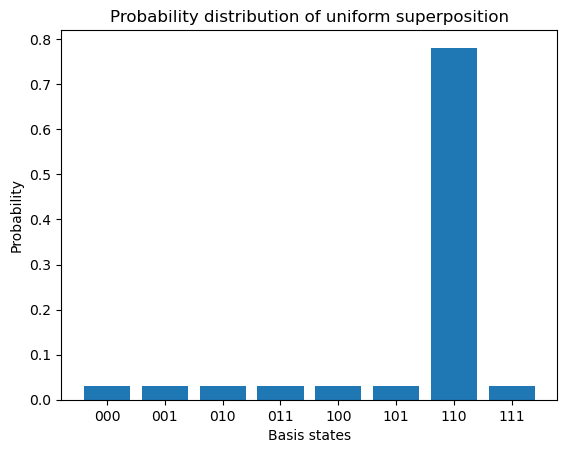

In [ ]:
cir = qiskit.QuantumCircuit(n)
# put the ciruit in a superpositon of all possible states
cir.h(range(n))
Oracle(cir) 
Diffusion (cir)

# plot the current amplitudes
cir.save_statevector()
sim = AerSimulator(method="statevector")
result = sim.run(cir).result()
state = result.get_statevector()
labels = [format(i, f'0{n}b') for i in range(2**n)]
probs = np.abs(state) ** 2

plt.bar(labels, probs)
plt.xlabel("Basis states")
plt.ylabel("Probability")
plt.title("Probability distribution of uniform superposition")
plt.show()

The probabilty of measuring the target state is even higher now and we should feel pretty confident that we would get the correct result

In [ ]:
#Optional draw the circuit
fig = (cir.draw(output="mpl"))
plt.show(fig)

Which best describes what applying the Oracle and Diffusion Step does?

a) Increases the probability of the correct answer

b) Decreases the probability of incorrect answers

c) Rotates probability mass toward the correct state

d) All of the above

In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

As we can see, the probability of the target state went up by a lot while the probabliy of the other states went down

In Grover's Algorithm, you usually repeat the process of applying the Oracle then diffusion step more than once
Lets calculate K, the amount of times to apply the 2 processes

In [ ]:
K = int(np.floor(np.pi / 4 * np.sqrt(2 ** n)))
print("K: ", K)

K:  2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

sim = AerSimulator(method="statevector")

states = []

def get_state(circ):
    tmp = circ.copy()
    tmp.save_statevector()
    result = sim.run(tmp).result()
    return result.get_statevector()

# --- build circuit step-by-step ---
cir = QuantumCircuit(n)

# initial H layer
cir.h(range(n))
states.append(get_state(cir))

for _ in range(K):
    Oracle(cir)

    Diffusion(cir)
    states.append(get_state(cir))   # after diffusion


labels = [format(i, f'0{n}b') for i in range(2**n)]

fig, ax = plt.subplots(figsize=(8,4))
bars = ax.bar(labels, np.zeros(len(labels)))

ax.set_ylim(0, 1)
ax.set_xlabel("Basis states")
ax.set_ylabel("Probability")

def update(frame):
    probs = np.abs(states[frame])**2
    for bar, p in zip(bars, probs):
        bar.set_height(p)
    ax.set_title(f"Step {frame}")
    return bars

ani = FuncAnimation(fig, update, frames=len(states), interval=700)

plt.close()
HTML(ani.to_jshtml())


In [ ]:
cir = qiskit.QuantumCircuit(n)
cir.h(range(n)) 
for _ in range(K):
    Oracle(cir)
    Diffusion(cir)
cir.save_statevector()
sim = AerSimulator(method="statevector")
result = sim.run(cir).result()
state = result.get_statevector()

labels = [format(i, f'0{n}b') for i in range(2**n)]
probs = np.abs(state) ** 2
plt.bar(labels, probs)
plt.xlabel("Basis states")
plt.ylabel("Probability")
plt.title("Probability distribution after algorithm completes")

Text(0.5, 1.0, 'Probability distribution after algorithm completes')

After several Grover iterations, what do you observe in the probability distribution?

a) All states become equally likely

b) The marked state’s probability increases relative to others

c) Probabilities disappear

d) The system becomes classical

In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

After running the Oracle and Diffusion step twice we see that the probabiltiy of measuring the target state has gotten quite high but can we do better if we increase K. Lets see what happens if we run it one more time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

sim = AerSimulator(method="statevector")

states = []

def get_state(circ):
    tmp = circ.copy()
    tmp.save_statevector()
    result = sim.run(tmp).result()
    return result.get_statevector()

# --- build circuit step-by-step ---
cir = QuantumCircuit(n)

# initial H layer
cir.h(range(n))
states.append(get_state(cir))
K = 10
for _ in range(K):
    Oracle(cir)

    Diffusion(cir)
    states.append(get_state(cir))   # after diffusion


labels = [format(i, f'0{n}b') for i in range(2**n)]

fig, ax = plt.subplots(figsize=(8,4))
bars = ax.bar(labels, np.zeros(len(labels)))

ax.set_ylim(0, 1)
ax.set_xlabel("Basis states")
ax.set_ylabel("Probability")

def update(frame):
    probs = np.abs(states[frame])**2
    for bar, p in zip(bars, probs):
        bar.set_height(p)
    ax.set_title(f"Step {frame}")
    return bars

ani = FuncAnimation(fig, update, frames=len(states), interval=700)

plt.close()
HTML(ani.to_jshtml())


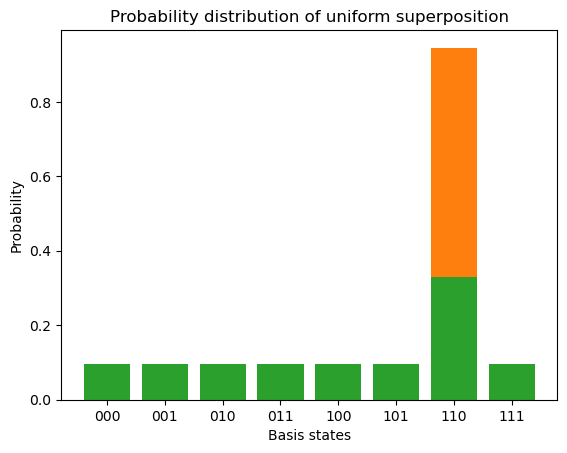

In [ ]:
K = K + 1

cir = qiskit.QuantumCircuit(n)
cir.h(range(n)) 
for _ in range(K):
    Oracle(cir)
    Diffusion(cir)
cir.save_statevector()
sim = AerSimulator(method="statevector")
result = sim.run(cir).result()
state = result.get_statevector()

labels = [format(i, f'0{n}b') for i in range(2**n)]
probs = np.abs(state) ** 2
plt.bar(labels, probs)
plt.xlabel("Basis states")
plt.ylabel("Probability")
plt.title("Probability distribution of uniform superposition")
plt.show()

As we can see the probabilites of measuring the other states has gone up not down, this is the opposite of what we want. You can keep running the code block above to see what happnes if we keep increasing K. Try and spot a pattern in the probabilty distrubution. 

If the Oracle and Diffusion Step are run too many times, what happens?

a) The probability of the correct answer keeps increasing

b) The probability oscillates and may decrease

c) The answer becomes deterministic

d) The circuit crashes

In [ ]:
ANSWER_1 = "TYPE ANSWER HERE"
if (ANSWER_1 == "TYPE ANSWER HERE"):
    raise ValueError("Please answer the question") 

## Grover's Algorithm on a Real Quantum Computer

##### Do this after they complete the post survey if they have time and/or they are interested on learning how to run on a real quantum computer. Show them also how to get API key

Now that we have a general idea of how Grover's Algorithm works, lets try running it on a real IBM quantum computer

In [ ]:
#Initial set up imports
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

ADD LINK TO TUTORIAL FOR HOW TO GET API KEY

In [ ]:
#Link your IBM account
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="PASTE API TOKEN HERE",
    overwrite=True 
)

Now we will create the circuit, this is mostly the same as what we did before, just some syntax differences.

In [ ]:
# Set up target and Quantum Circuit
target = "101"
target = target[::-1]
n = len(target)

qc = QuantumCircuit(n)
qc.h(range(n))

In [ ]:
#Define the Oracle for a real Quantum Computer
def Oracle_Real(circuit):
    for i in range(n):
        if target[i] == "0":
            circuit.x(i)
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    for i in range(n):
        if target[i] == "0":
            circuit.x(i)


In [ ]:
#Define Diffusion for a real Quantum Computer
def Diffusion_Real(circuit):
    for i in range(n):
        circuit.h(i)
    for i in range(n):
        circuit.x(i)
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    for i in range(n):
        circuit.x(i)
    for i in range(n):
        circuit.h(i)


In [ ]:
# Apply the Oracle and Diffusion step K times
k = int(np.floor(np.pi / 4 * np.sqrt(2 ** n)))
for _ in range(k):
    Oracle_Real(qc)
    Diffusion_Real(qc)

#measure the results
qc.measure_all()

Now that we have th circuit built lets find a real quantum computer to run it on. Be careful running the code block below too manhy times since it does use up quantum resources that have a limit for when they are free

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(
    operational=True,
    simulator=False,
    min_num_qubits=n
)
print("Running on:", backend.name)


Now we can actually run the circuit. We will run it multiple times and plot what results we get

In [ ]:
qc_transpiled = transpile(qc, backend=backend, optimization_level=3)

sampler = SamplerV2(mode=backend)

# Submit the job and get results
job = sampler.run([qc_transpiled], shots=1024)
print(f"Job ID: {job.job_id}")
result = job.result()
counts = result[0].data.meas.get_counts()
print(f"Measurement counts: ", counts)


plot_histogram(counts)
plt.show()

As we can see the probablity of our target state is still much higher than the rest of the states. 
Unlike with the AER simulator however, the other state probabilites are a little higher and more random. This is due to the fact that real quantum computers have noice or interference that changes the probabilites.

## Post Survey


Insert post survey link here